# Artificial Neural Networks and Deep Learning

---

## Homework 2: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.


## 🌐 Connect Colab to Google Drive

## ⚙️ Import Libraries

In [15]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import random
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.16.2
Keras version: 3.6.0
GPU devices: 1


## ⏳ Load the Data

In [16]:
data = np.load("new_mars_clean_data.npz")
#data = np.load("new_mars_clean_data.npz")
training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2505, 64, 128)
Training y shape: (2505, 64, 128)
Test X shape: (10022, 64, 128)


## 🛠️ Train and Save the Model

In [17]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")

Input shape: (64, 128, 1)
Number of classes: 5


In [18]:
def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mask_statistics(y_train):
    """
    Calcola e visualizza statistiche sulle maschere del dataset.

    Args:
        y_train (numpy.ndarray): Array 3D (N, H, W) contenente maschere con valori interi rappresentanti le classi.

    Returns:
        None
    """
    # Flatten per considerare tutte le maschere insieme
    all_pixels = y_train.flatten()

    # Calcola valori unici e le loro occorrenze
    unique_classes, pixel_counts = np.unique(all_pixels, return_counts=True)

    # Calcola la percentuale di pixel per classe
    total_pixels = all_pixels.size
    class_percentages = (pixel_counts / total_pixels) * 100

    # Stampa statistiche
    print("Statistiche delle maschere:")
    print("Classe | Conteggio pixel | Percentuale")
    print("-------------------------------------")
    for cls, count, pct in zip(unique_classes, pixel_counts, class_percentages):
        print(f"{cls:6} | {count:15} | {pct:10.2f}%")

    # Plot distribuzione delle classi
    plt.figure(figsize=(10, 6))
    plt.bar(unique_classes, class_percentages, color="skyblue", edgecolor="black")
    plt.xlabel("Classi")
    plt.ylabel("Percentuale di pixel (%)")
    plt.title("Distribuzione delle classi nelle maschere")
    plt.xticks(unique_classes)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

Statistiche delle maschere:
Classe | Conteggio pixel | Percentuale
-------------------------------------
   0.0 |         4988826 |      24.31%
   1.0 |         6957538 |      33.90%
   2.0 |         4776810 |      23.28%
   3.0 |         3770823 |      18.38%
   4.0 |           26963 |       0.13%


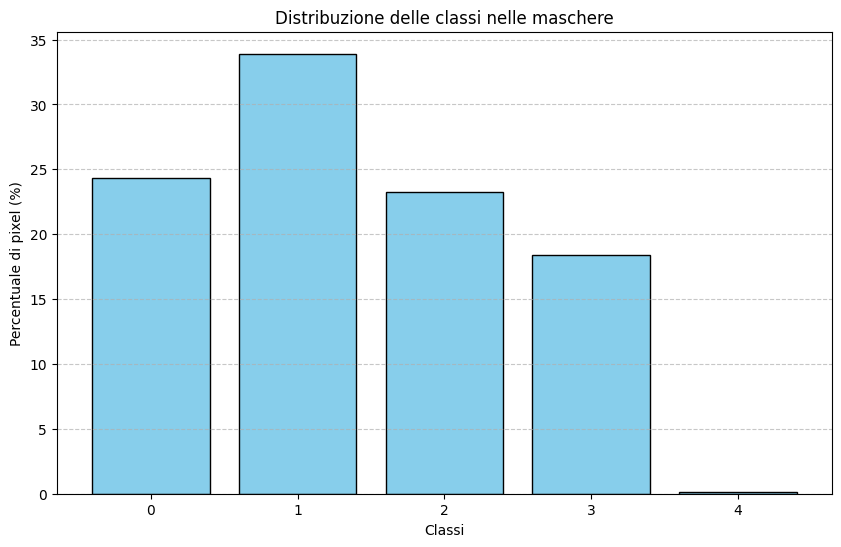

In [187]:
plot_mask_statistics(y_train)

In [20]:
# prompt: split x train in train test val

from sklearn.model_selection import train_test_split

print("Splitting data...")

train_img, test_img, train_lbl, test_lbl = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

train_img, val_img, train_lbl, val_lbl = train_test_split(
     train_img, train_lbl, test_size=0.2, random_state=42
)

train_img = np.concatenate([train_img,test_img])
train_lbl = np.concatenate([train_lbl,test_lbl])



print("Data splitted! 0.7 - 0.2 - 0.1")

print(f"\nNumber of images:")
print(f"Train: {len(train_img)}")
print(f"Validation: {len(val_img)}")

print(f"Train shape: {train_img.shape}")
print(f"Validation shape: {val_img.shape}")


Splitting data...
Data splitted! 0.7 - 0.2 - 0.1

Number of images:
Train: 2054
Validation: 451
Train shape: (2054, 64, 128, 1)
Validation shape: (451, 64, 128, 1)


Statistiche delle maschere:
Classe | Conteggio pixel | Percentuale
-------------------------------------
   0.0 |         4126747 |      24.53%
   1.0 |         5643023 |      33.54%
   2.0 |         3962027 |      23.55%
   3.0 |         3073595 |      18.27%
   4.0 |           20976 |       0.12%


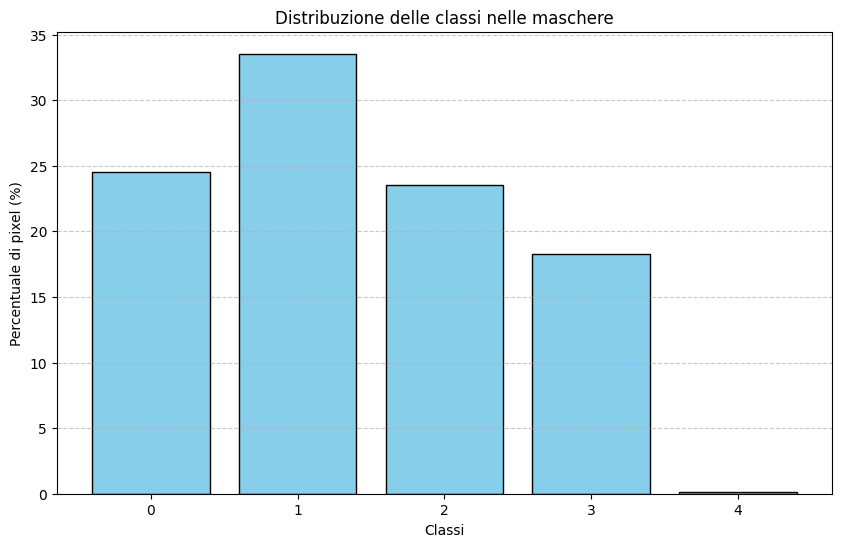

In [189]:
plot_mask_statistics(train_lbl)

In [6]:

def calculate_bigrock_percentage(mask):
    # Conta i pixel di background
    bigrock_pixels = np.sum(mask == 4)
    total_pixels = mask.size
    # Calcola la percentuale di background
    bigrock_percentage = bigrock_pixels / total_pixels
    return bigrock_percentage

Statistiche delle maschere:
Classe | Conteggio pixel | Percentuale
-------------------------------------
   0.0 |         4126747 |      24.53%
   1.0 |         5643023 |      33.54%
   2.0 |         3962027 |      23.55%
   3.0 |         3073595 |      18.27%
   4.0 |           20976 |       0.12%


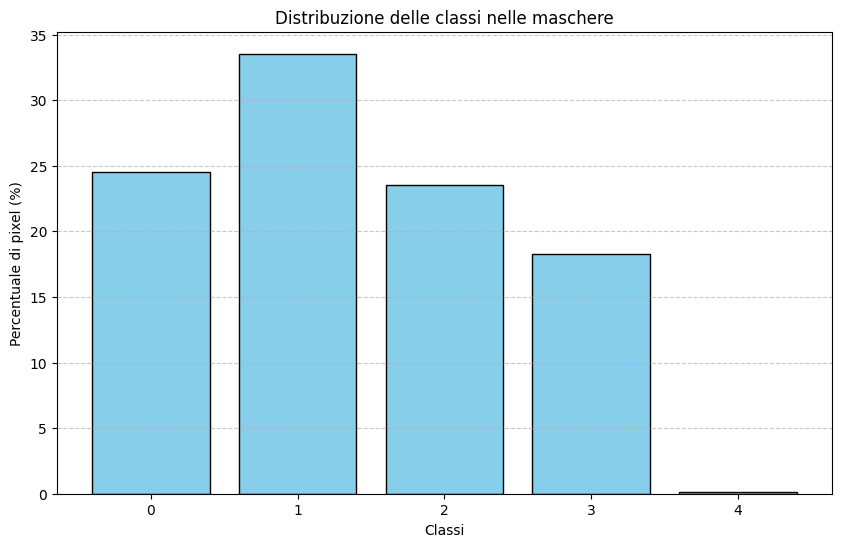

In [11]:
plot_mask_statistics(train_lbl)

In [21]:
def get_bounding_box(mask):
    # Trova i pixel che hanno il valore 4
    non_zero_indices = tf.where(mask == 4)
    
    if tf.size(non_zero_indices) == 0:
        print("Error: No pixels with label == 4")
        return None  # Non ci sono pixel con label == 4
    
    # Converte le coordinate in numerico (int32)
    non_zero_indices = tf.cast(non_zero_indices, tf.int32)
    
    # Trova il bounding box min e max
    min_coords = tf.reduce_min(non_zero_indices, axis=0)
    max_coords = tf.reduce_max(non_zero_indices, axis=0)

    print(f"Bounding box min: {min_coords.numpy()}")
    print(f"Bounding box max: {max_coords.numpy()}")
    
    # Restituisci il bounding box come (y_min, y_max, x_min, x_max)
    return min_coords[0].numpy(), max_coords[0].numpy(), min_coords[1].numpy(), max_coords[1].numpy()

def zoom_on_region(image, mask, y_min_pixel, y_max_pixel, x_min_pixel, x_max_pixel):
    # Verifica che le dimensioni del bounding box siano valide
    if y_min_pixel >= y_max_pixel or x_min_pixel >= x_max_pixel:
        print(f"Bounding box invalid: y_min_pixel={y_min_pixel}, y_max_pixel={y_max_pixel}, "
             f"x_min_pixel={x_min_pixel}, x_max_pixel={x_max_pixel}")
        return image, mask  # Restituisci None se il bounding box non è valido
    
    print(y_min_pixel, y_max_pixel, x_min_pixel, x_max_pixel)
    print(y_max_pixel-y_min_pixel, x_max_pixel-x_min_pixel)
    # Estrarre la regione dell'immagine e della maschera
    zoomed_image = image[y_min_pixel:y_max_pixel, x_min_pixel:x_max_pixel, :]
    zoomed_mask = mask[y_min_pixel:y_max_pixel, x_min_pixel:x_max_pixel]


    print(f"Zoomed image shape: {zoomed_image.shape}")
    print(f"Zoomed mask shape: {zoomed_mask.shape}")
    
    # Verifica che la regione estratta non sia vuota
    if tf.size(zoomed_image) == 0 or tf.size(zoomed_mask) == 0:
        print("Error: Extracted region is empty!")
        return image, mask
    if 0<=zoomed_image.shape[0]<64 or 0<= zoomed_image.shape[1]<=128 or 0<=zoomed_mask.shape[0]<64 or 0<= zoomed_mask.shape[1]<=128 and zoomed_image.shape[2] == 1:
        return zoomed_image, zoomed_mask
    
    return image, mask




In [22]:
def image_zoomed_on_bigrock(img, mask):
    zoomed_images = []
    zoomed_masks = []
    # Provo ad aumentare la presenza di bigrock
    for j in range(len(mask)):
        bigrock_percentage = calculate_bigrock_percentage(mask[j])

        if bigrock_percentage > 0.01:
            bb_y_min, bb_y_max, bb_x_min, bb_x_max = get_bounding_box(mask[j])
            if (bb_x_max+bb_x_min+bb_y_max+bb_y_min) != 0:  # Non regione vuota
                # Esegui lo zoom sull'immagine
                zoomed_image, zoomed_mask = zoom_on_region(img[j], mask[j], bb_y_min, bb_y_max, bb_x_min, bb_x_max)
                '''
                # Verifica che la forma dell'immagine e della maschera siano corrette
                if zoomed_image.shape[0] >= zoomed_mask.shape[0] and zoomed_image.shape[1] >=  zoomed_mask.shape[1]:
                    colormap = create_segmentation_colormap(5)

                    print(f"Zoomed image shape: {zoomed_image.shape}")
                    print(f"Zoomed mask shape: {zoomed_mask.shape}")

                    # Visualizza l'immagine
                    
                    plt.subplot(1, 2, 1)  # 1 riga, 2 colonne, posizione 1
                    if(len(zoomed_image.shape) == 3):
                        plt.imshow(zoomed_image.squeeze(), cmap='gray')  # Squeeze per rimuovere la dimensione del canale'
                    else:
                        plt.imshow(zoomed_image, cmap='gray')
                    plt.title('Zoomed Image')
                    plt.axis('off')  # Disabilita gli assi

                    # Visualizza la maschera
                    plt.subplot(1, 2, 2)  # 1 riga, 2 colonne, posizione 2
                    colored_label = apply_colormap(zoomed_mask, colormap)
                    plt.imshow(colored_label)  # Usa un colormap a colori per la maschera
                    plt.title('Zoomed Mask')
                    plt.axis('off')  # Disabilita gli assi

                    #plt.tight_layout()
                    #plt.show()
                    #plt.close()
                    
                
                else:
                    print("Error in shape of zoomed image or mask.")
                    '''
                zoomed_images.append(zoomed_image)
                zoomed_masks.append(zoomed_mask)
            else:
                print("No pixels with target value found.")

    return zoomed_images, zoomed_masks


In [23]:
import numpy as np
import random

def replace_patch_with_masks(img1, img2, mask1, mask2):
    """
    Sostituisce una porzione di `img1` con `img2`, utilizzando le maschere.

    Parameters:
    - img1 (numpy.ndarray): L'immagine più grande, di dimensioni (64, 128, 1).
    - img2 (numpy.ndarray): L'immagine più piccola, da inserire, deve avere shape (h2, w2, 1).
    - mask1 (numpy.ndarray): Maschera di `img1` di dimensioni (64, 128).
    - mask2 (numpy.ndarray): Maschera di `img2` di dimensioni (h2, w2).

    Returns:
    - tuple: (`img1` modificata, maschera risultante dalla fusione tra `mask1` e `mask2`).
    """
    h2, w2 = mask2.shape
    
    min_val = np.min(img1)
    max_val = np.max(img1)
    print("Img_1" , max_val, min_val)
    print(img1.dtype)

    min_val = np.min(img2)
    max_val = np.max(img2)
    print("Img_2" , max_val, min_val)
    print(img2.dtype)

    # Generazione di coordinate valide per il punto in alto a sinistra
    max_row = mask1.shape[0] - h2
    max_col = mask1.shape[1] - w2

    row = random.randint(0, max_row)
    col = random.randint(0, max_col)

    # Applicazione delle maschere per la sostituzione
    image_result = img1.copy()
    image_result[row:row + h2, col:col + w2, 0] = img2[:, :, 0]

    min_val = np.min(image_result)
    max_val = np.max(image_result)
    print("Img_result" , max_val, min_val)
    print(image_result.dtype)

    
    # Creazione della maschera risultante
    mask_result = mask1.copy()
    mask_result[row:row + h2, col:col + w2] = mask2

    return image_result, mask_result

Bounding box min: [ 3 46]
Bounding box max: [18 81]
3 18 46 81
15 35
Zoomed image shape: (15, 35, 1)
Zoomed mask shape: (15, 35)
Bounding box min: [0 0]
Bounding box max: [48 68]
0 48 0 68
48 68
Zoomed image shape: (48, 68, 1)
Zoomed mask shape: (48, 68)
Bounding box min: [ 0 39]
Bounding box max: [63 71]
0 63 39 71
63 32
Zoomed image shape: (63, 32, 1)
Zoomed mask shape: (63, 32)
Bounding box min: [56 35]
Bounding box max: [63 71]
56 63 35 71
7 36
Zoomed image shape: (7, 36, 1)
Zoomed mask shape: (7, 36)
Bounding box min: [28 57]
Bounding box max: [ 41 101]
28 41 57 101
13 44
Zoomed image shape: (13, 44, 1)
Zoomed mask shape: (13, 44)
Bounding box min: [ 0 97]
Bounding box max: [ 30 127]
0 30 97 127
30 30
Zoomed image shape: (30, 30, 1)
Zoomed mask shape: (30, 30)
Bounding box min: [45  0]
Bounding box max: [ 54 111]
45 54 0 111
9 111
Zoomed image shape: (9, 111, 1)
Zoomed mask shape: (9, 111)
Bounding box min: [27 28]
Bounding box max: [ 63 125]
27 63 28 125
36 97
Zoomed image shape:

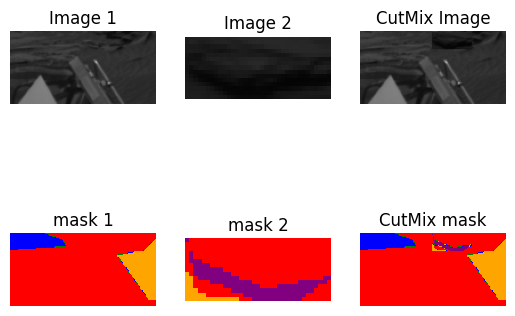

Img_1 0.27058823529411763 0.16862745098039217
float64
Img_2 0.4549019607843137 0.058823529411764705
float64
Img_result 0.4549019607843137 0.058823529411764705
float64


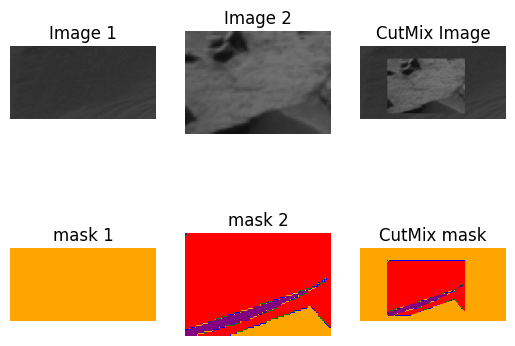

Img_1 0.5098039215686274 0.054901960784313725
float64
Img_2 0.3568627450980392 0.03529411764705882
float64
Img_result 0.5098039215686274 0.03529411764705882
float64


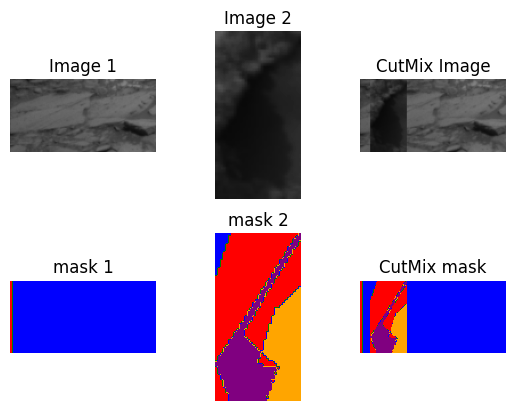

Img_1 0.6549019607843137 0.058823529411764705
float64
Img_2 0.396078431372549 0.12549019607843137
float64
Img_result 0.6549019607843137 0.058823529411764705
float64


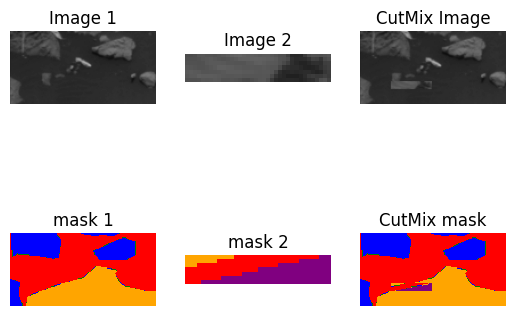

Img_1 0.5176470588235295 0.19215686274509805
float64
Img_2 0.3607843137254902 0.043137254901960784
float64
Img_result 0.5176470588235295 0.043137254901960784
float64


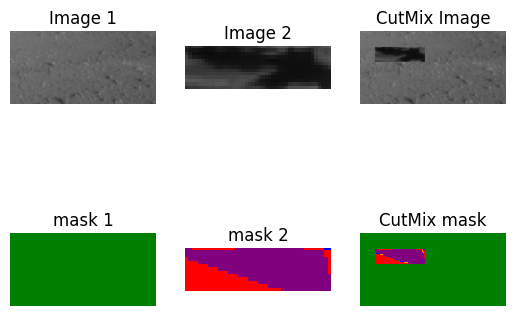

Img_1 0.27058823529411763 0.03529411764705882
float64
Img_2 0.4 0.08235294117647059
float64
Img_result 0.4 0.03529411764705882
float64
Img_1 0.7215686274509804 0.01568627450980392
float64
Img_2 0.3843137254901961 0.07450980392156863
float64
Img_result 0.7215686274509804 0.01568627450980392
float64
Img_1 0.49411764705882355 0.1450980392156863
float64
Img_2 0.49411764705882355 0.06274509803921569
float64
Img_result 0.49411764705882355 0.06274509803921569
float64
Img_1 0.24313725490196078 0.054901960784313725
float64
Img_2 0.34901960784313724 0.03529411764705882
float64
Img_result 0.34901960784313724 0.03529411764705882
float64
Img_1 0.7019607843137254 0.054901960784313725
float64
Img_2 0.27058823529411763 0.050980392156862744
float64
Img_result 0.7019607843137254 0.050980392156862744
float64
Img_1 0.5333333333333333 0.054901960784313725
float64
Img_2 0.37254901960784315 0.043137254901960784
float64
Img_result 0.5333333333333333 0.043137254901960784
float64
Img_1 0.4823529411764706 0.0509

In [24]:
import numpy as np
import random
from matplotlib.colors import ListedColormap 

cut_images, cut_masks = image_zoomed_on_bigrock(train_img, train_lbl)
for i in range(len(cut_images)):
        colors = ['red', 'green', 'blue', 'orange', 'purple']  # Adjust colors as needed
        class_labels = ['background', 'soil', 'bedrock', 'sand', 'big_rock']  # Add your class labels
        cmap = ListedColormap(colors)

        #prendo un indice random tra 0 e len(train_img)
        idx = random.randint(0, len(train_img)-1)
        # Coordinate del punto in alto a sinistra per il ritaglio
        image_result, mask_result = replace_patch_with_masks(train_img[idx], cut_images[i], train_lbl[idx], cut_masks[i])

        train_img = np.concatenate((train_img, image_result[np.newaxis, ...]), axis=0)
        train_lbl= np.concatenate((train_lbl, mask_result[np.newaxis, ...]), axis=0)
        

        # Plot delle immagini originali e dell'immagine generata con cutmix
        if(0<= i<5):

                plt.subplot(2, 3, 1)
                plt.imshow(train_img[idx].squeeze(), cmap='gray', vmin=0, vmax=1)
                plt.title('Image 1')
                plt.axis('off')
                
                plt.subplot(2, 3, 2)
                plt.imshow(cut_images[i].squeeze(), cmap='gray', vmin=0, vmax=1)
                plt.title('Image 2')
                plt.axis('off')
                
                plt.subplot(2, 3, 3)
                plt.imshow(image_result.squeeze(), cmap='gray', vmin=0, vmax=1)
                plt.title('CutMix Image')
                plt.axis('off')
                
                plt.subplot(2, 3, 4)
                plt.imshow(train_lbl[idx], cmap=cmap, vmin=0, vmax=len(colors) - 1)
                plt.title('mask 1')
                plt.axis('off')
                
                plt.subplot(2, 3, 5)
                plt.imshow(cut_masks[i],cmap=cmap, vmin=0, vmax=len(colors) - 1)
                plt.title('mask 2')
                plt.axis('off')
                
                plt.subplot(2, 3, 6)
                plt.imshow(mask_result,cmap=cmap, vmin=0, vmax=len(colors) - 1)
                plt.title('CutMix mask')
                plt.axis('off')
                
                plt.show()
         
    
   

Statistiche delle maschere:
Classe | Conteggio pixel | Percentuale
-------------------------------------
   0.0 |         4137534 |      24.55%
   1.0 |         5647069 |      33.51%
   2.0 |         3962030 |      23.51%
   3.0 |         3076466 |      18.26%
   4.0 |           27845 |       0.17%


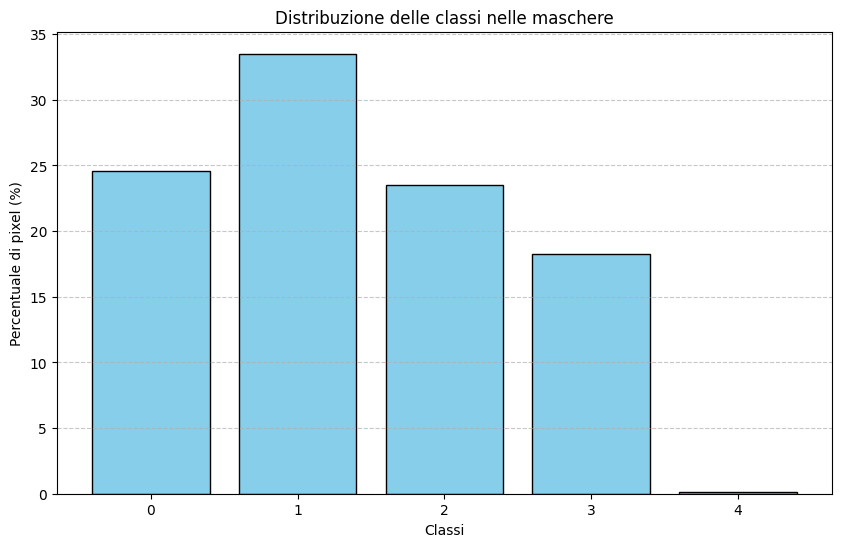

Train shape: (2057, 64, 128, 1)
Train shape: (2057, 64, 128)


In [197]:
plot_mask_statistics(train_lbl)
print(f"Train shape: {train_img.shape}")
print(f"Train shape: {train_lbl.shape}")

In [ ]:
# Definition of hyperparameters

data_params = {
    'batch_size': 32,
    'input_shape': (64, 128, 3),
    'num_classes': 5,
    'seed': 42
}

HYPERPARAMETERS = {
    "BATCH_SIZE": 32,
    "EPOCHS": 200,
    "LEARNING_RATE": 0.001,
    "LEARNING_DESCENT_PATIENCE": 20,
    "LEARNING_DESCENT_FACTOR": 0.5,
    "EARLY_STOPPING_PATIENCE": 30,
    "DROPOUT": 0.4,
    "LAYERS_FINE_TUNE": 0,
    "MODEL_NAME": "boh",
}

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

@tf.function
def preprocess(image, label):
    """
    Assicura che immagine e maschera abbiano la dimensione corretta.
    """
    if len(image.shape) == 2:
        image = tf.expand_dims(image, axis=-1)  # Aggiungi dimensione del canale
    if len(label.shape) == 2:
        label = tf.expand_dims(label, axis=-1)  # Aggiungi dimensione del canale
    return image, label

def random_brightness():
        bright = tf.keras.layers.RandomBrightness(factor=0.2, 
                                                  value_range=(0,1))
        layers = [bright]
        bright_model = tf.keras.Sequential(layers)
    
        return bright_model

def random_augmentation():
        
    flip = tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")

    zoom = tf.keras.layers.RandomZoom(height_factor = (-0.2, 0.2),
                    width_factor=(-0.2, 0.2),
                    fill_mode="reflect",
                    interpolation="bilinear",
                    seed=None,
                    fill_value=0.0,
                    data_format=None,
                )

    rot = tf.keras.layers.RandomRotation(factor=(0.5, 0.5))

    transl = tf.keras.layers.RandomTranslation(height_factor=(-0.2, 0.2),
                                                width_factor=(-0.2, 0.2),
                                                fill_mode="wrap",
                                                
                                                )
    
    flip_prob = tf.random.uniform([])
    zoom_prob = tf.random.uniform([])
    rot_prob = tf.random.uniform([])
    transl_prob = tf.random.uniform([])
    layer = []
    if flip_prob > 0.5:
        layer.append(flip)
    if zoom_prob > 0.5:
        layer.append(zoom)
    if rot_prob > 0.5:
        layer.append(rot)
    if transl_prob > 0.5:
        layer.append(transl)
    
    if len(layer) == 0:
        return None
    else:
        aug_model = tf.keras.Sequential(layer)
        return aug_model

aug= random_augmentation()
aug_brightness = random_brightness()

def augment_using_layers(images, mask, size=None):

    mask = tf.cast(mask, 'float32')

    images = aug_brightness(images)
    images_mask = tf.concat([images, mask], -1)
    images_mask_aug = aug(images_mask)
    if images_mask is None:
        images_mask_aug = images_mask

    image = images_mask_aug[:,:,0]
    mask = images_mask_aug[:,:,1]

    image = tf.expand_dims(image,axis=-1)

    return image, tf.cast(mask, 'uint8')



In [ ]:
def load_single_image(image_path, label_path, input_size=(64, 128)):
    """
    Load a single image-label pair with the correct shape.
    """
    image = tf.cast(image_path, tf.float32)

    label = tf.cast(label_path, tf.int32)
    label = tf.expand_dims(label, axis=-1)  # Add a channel dimension

    return image, label

In [ ]:
def make_dataset(train_images, train_labels, batch_size, shuffle=True, augment=False, seed=None):
    """
    Create a memory-efficient TensorFlow dataset.
    """
    # Create dataset from file paths
    dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=batch_size * 2, seed=seed)

    dataset = dataset.map(
        load_single_image,
        num_parallel_calls=tf.data.AUTOTUNE
    )

    if augment:
      dataset = dataset.map(lambda x, y: augment_using_layers(x, y))

    # Batch the data
    dataset = dataset.batch(batch_size, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

In [ ]:
# Create the datasets
print("Creating datasets...")

train_dataset = make_dataset(
    train_img, train_lbl,
    batch_size= HYPERPARAMETERS['BATCH_SIZE'],
    shuffle=True,
    augment=True,
    seed= data_params['seed']
)

val_dataset = make_dataset(
    val_img, val_lbl,
    batch_size= HYPERPARAMETERS['BATCH_SIZE'],
    shuffle=False
)

test_dataset = make_dataset(
    test_img, test_lbl,
    batch_size= HYPERPARAMETERS['BATCH_SIZE'],
    shuffle=False
)
print("Datasets created!")

# Check the shape of the data
for images, labels in train_dataset.take(1):
    input_shape = images.shape[1:]
    print(f"\nInput shape: {input_shape}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Labels dtype:", labels.dtype)
    break

Creating datasets...
Datasets created!

Input shape: (64, 128, 1)
Images shape: (32, 64, 128, 1)
Labels shape: (32, 64, 128)
Labels dtype: <dtype: 'uint8'>


2024-12-11 17:01:50.412700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_15}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2024-12-11 17:01:50.412752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_15}}]]
	 [[GroupCrossDeviceControlEdges_0/NoOp/_14]] [type.googleapis.com/tensorflow.DerivedStatus='']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

def plot_sample_batch(original_dataset, augmented_dataset, num_samples=3):
    """
    Display some image and label pairs from the original and augmented datasets.
    """
    plt.figure(figsize=(15, 4*num_samples))

    for (original_images, original_labels), (augmented_images, augmented_labels) in zip(original_dataset.take(1), augmented_dataset.take(1)):
        # Estrai le labels dai dizionari
        original_labels = original_labels['output_layer'].numpy()
        augmented_labels = augmented_labels['output_layer'].numpy()

        num_classes = len(np.unique(original_labels))
        colormap = create_segmentation_colormap(num_classes)

        for j in range(min(num_samples, len(original_images))):
            # Plot original image
            plt.subplot(num_samples, 4, j*4 + 1)
            plt.imshow(original_images[j])
            plt.title(f'Original Image {j+1}')
            plt.axis('off')

            # Plot original label
            plt.subplot(num_samples, 4, j*4 + 2)
            colored_label = apply_colormap(original_labels[j], colormap)
            plt.imshow(colored_label)
            plt.title(f'Original Label {j+1}')
            plt.axis('off')

            # Plot augmented image
            plt.subplot(num_samples, 4, j*4 + 3)
            plt.imshow(augmented_images[j])
            plt.title(f'Augmented Image {j+1}')
            plt.axis('off')

            # Plot augmented label
            plt.subplot(num_samples, 4, j*4 + 4)
            colored_label = apply_colormap(augmented_labels[j], colormap)
            plt.imshow(colored_label)
            plt.title(f'Augmented Label {j+1}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
import tensorflow as tf
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Define the custom StopGradientLayer class
@tf.keras.utils.register_keras_serializable()
class StopGradientLayer(tfkl.Layer):
    def call(self, inputs):
        return tf.stop_gradient(inputs)

class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)

class VizCallback(tf.keras.callbacks.Callback):
    def __init__(self, image_paths, label_paths, output_dir, frequency=5):
        super().__init__()
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.output_dir = output_dir
        self.frequency = frequency

        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.frequency == 0:
            colors = ['red', 'green', 'blue', 'orange', 'purple']
            class_labels = ['background', 'soil', 'bedrock', 'sand', 'big_rock']
            cmap = ListedColormap(colors)

            #ATTENZIONE tolgo l'immagine 261 -> l'immagine fa schifo secodno me va tolta dal dataset e vanno trovate le altre sporcaccione come a lei
            indices = [122, len(self.image_paths) - 1, random.randint(0, len(self.image_paths) - 1)]
            fig, axes = plt.subplots(3, 4, figsize=(12, 20))

            for i, idx in enumerate(indices):
                image = self.image_paths[idx]
                label = self.label_paths[idx]
                image1 = tf.expand_dims(image, 0)

                # Predict and debug the format
                predictions = self.model.predict(image1, verbose=0)
                print("Type of predictions:", type(predictions))

                # Handle different output formats
                if isinstance(predictions, dict):
                    output_1 = predictions.get('output_activation_layer')
                    output_2 = predictions.get('output_layer')
                elif isinstance(predictions, (list, tuple)):
                    output_1 = predictions[0]
                    output_2 = predictions[1] if len(predictions) > 1 else None
                else:
                    output_1 = predictions
                    output_2 = None

                # Compute predictions
                y_pred1 = tf.math.argmax(output_1, axis=-1).numpy()
                y_pred2 = tf.math.argmax(output_2, axis=-1).numpy() if output_2 is not None else None

                # Display original image
                axes[i, 0].imshow(image, cmap='gray')
                axes[i, 0].set_title(f"Image {idx}")
                axes[i, 0].axis('off')

                # Display ground truth
                axes[i, 1].imshow(label, cmap=cmap, vmin=0, vmax=len(colors) - 1)
                axes[i, 1].set_title(f"Label {idx}")
                axes[i, 1].axis('off')

                # Display first output prediction
                axes[i, 2].imshow(y_pred1[0], cmap=cmap, vmin=0, vmax=len(colors) - 1)
                axes[i, 2].set_title(f"Prediction PEPPE's model{idx}")
                axes[i, 2].axis('off')

                # Display second output prediction if available
                if y_pred2 is not None:
                    axes[i, 3].imshow(y_pred2[0], cmap=cmap, vmin=0, vmax=len(colors) - 1)
                    axes[i, 3].set_title(f"Prediction SECONDO Model{idx}")
                    axes[i, 3].axis('off')
                else:
                    axes[i, 3].axis('off')

            plt.tight_layout()
            save_path = os.path.join(self.output_dir, f"epoch_{epoch}.png")
            plt.savefig(save_path)
            plt.close(fig)


## If models need to be imported


## Otherwise

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers as tfkl

# Residual Block
def residual_block(x, filters, kernel_size=3, activation='relu', name=''):
    shortcut = tfkl.Conv2D(filters, kernel_size=1, padding='same', kernel_initializer='he_normal', name=name + '_shortcut')(x)
    x = tfkl.Conv2D(filters, kernel_size, padding='same', kernel_initializer='he_normal', name=name + '_conv1')(x)
    x = tfkl.BatchNormalization(name=name + '_bn1')(x)
    x = tfkl.Activation(activation, name=name + '_activation1')(x)

    x = tfkl.Conv2D(filters, kernel_size, padding='same', kernel_initializer='he_normal', name=name + '_conv2')(x)
    x = tfkl.BatchNormalization(name=name + '_bn2')(x)
    x = tfkl.Add(name=name + '_add')([x, shortcut])
    x = tfkl.Activation(activation, name=name + '_activation2')(x)
    return x

# Attention Block
def attention_block(g, x, filters, name=''):
    theta_x = tfkl.Conv2D(filters, (1, 1), padding='same', kernel_initializer='he_normal', name=name + '_theta')(x)
    phi_g = tfkl.Conv2D(filters, (1, 1), padding='same', kernel_initializer='he_normal', name=name + '_phi')(g)
    f = tfkl.Activation('relu', name=name + '_activation')(tfkl.Add(name=name + '_add')([theta_x, phi_g]))
    psi_f = tfkl.Conv2D(1, (1, 1), padding='same', activation='sigmoid', kernel_initializer='he_normal', name=name + '_psi')(f)
    return tfkl.Multiply(name=name + '_multiply')([x, psi_f])

# U-Net with Attention and Residual Blocks
def get_segmentation_model(input_shape=input_shape, num_classes=num_classes, dropout_rate=0.0):
    inputs = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling Path
    d1 = residual_block(inputs, 64, name='down_block1')
    p1 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool1')(d1)

    d2 = residual_block(p1, 128, name='down_block2')
    p2 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool2')(d2)

    d3 = residual_block(p2, 256, name='down_block3')
    p3 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool3')(d3)

    d4 = residual_block(p3, 512, name='down_block4')
    p4 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool4')(d4)

    # Bottleneck with Dropout and Dilated Convolutions
    b = residual_block(p4, 1024, name='bottleneck')  # Aumenta i filtri per il bottleneck
    b = tfkl.Dropout(dropout_rate, name='bottleneck_dropout')(b)

    # Upsampling Path with Attention
    u4 = tfkl.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same', name='up_block4_upsample')(b)
    a4 = attention_block(u4, d4, 512, name='up_block4_attention')
    u4 = tfkl.Concatenate(name='up_block4_concat')([u4, a4])
    u4 = residual_block(u4, 512, name='up_block4')

    u3 = tfkl.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', name='up_block3_upsample')(u4)
    a3 = attention_block(u3, d3, 256, name='up_block3_attention')
    u3 = tfkl.Concatenate(name='up_block3_concat')([u3, a3])
    u3 = residual_block(u3, 256, name='up_block3')

    u2 = tfkl.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', name='up_block2_upsample')(u3)
    a2 = attention_block(u2, d2, 128, name='up_block2_attention')
    u2 = tfkl.Concatenate(name='up_block2_concat')([u2, a2])
    u2 = residual_block(u2, 128, name='up_block2')

    u1 = tfkl.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', name='up_block1_upsample')(u2)
    a1 = attention_block(u1, d1, 64, name='up_block1_attention')
    u1 = tfkl.Concatenate(name='up_block1_concat')([u1, a1])
    u1 = residual_block(u1, 64, name='up_block1')

    conv_output = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', name='output_conv_layer')(u1)
    outputs = tfkl.Activation('softmax', name='output_activation_layer')(conv_output)

    # Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Advanced_UNet')

    return inputs, conv_output, outputs, b, d1, d2, d3, d4

def get_segmentation_mode_import(input_shape=input_shape, num_classes=num_classes, dropout_rate=0.0):
    inputs = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling Path
    d1 = residual_block(inputs, 64, name='down_block1')
    p1 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool1')(d1)

    d2 = residual_block(p1, 128, name='down_block2')
    p2 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool2')(d2)

    d3 = residual_block(p2, 256, name='down_block3')
    p3 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool3')(d3)

    d4 = residual_block(p3, 512, name='down_block4')
    p4 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool4')(d4)

    # Bottleneck with Dropout and Dilated Convolutions
    b = residual_block(p4, 1024, name='bottleneck')  # Aumenta i filtri per il bottleneck
    b = tfkl.Dropout(dropout_rate, name='bottleneck_dropout')(b)

    # Upsampling Path with Attention
    u4 = tfkl.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same', name='up_block4_upsample')(b)
    a4 = attention_block(u4, d4, 512, name='up_block4_attention')
    u4 = tfkl.Concatenate(name='up_block4_concat')([u4, a4])
    u4 = residual_block(u4, 512, name='up_block4')

    u3 = tfkl.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', name='up_block3_upsample')(u4)
    a3 = attention_block(u3, d3, 256, name='up_block3_attention')
    u3 = tfkl.Concatenate(name='up_block3_concat')([u3, a3])
    u3 = residual_block(u3, 256, name='up_block3')

    u2 = tfkl.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', name='up_block2_upsample')(u3)
    a2 = attention_block(u2, d2, 128, name='up_block2_attention')
    u2 = tfkl.Concatenate(name='up_block2_concat')([u2, a2])
    u2 = residual_block(u2, 128, name='up_block2')

    u1 = tfkl.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', name='up_block1_upsample')(u2)
    a1 = attention_block(u1, d1, 64, name='up_block1_attention')
    u1 = tfkl.Concatenate(name='up_block1_concat')([u1, a1])
    u1 = residual_block(u1, 64, name='up_block1')

    conv_output = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', name='output_conv_layer')(u1)
    outputs = tfkl.Activation('softmax', name='output_activation_layer')(conv_output)

    # Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Advanced_UNet')

    return model



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model

# Definizione del custom layer
@tf.keras.utils.register_keras_serializable()
class ArgmaxLayer(Layer):
    def __init__(self, **kwargs):
        super(ArgmaxLayer, self).__init__(**kwargs)

    def call(self, inputs):
        # Usa la funzione tf.argmax e espandi le dimensioni
        argmax_output = tf.argmax(inputs, axis=-1)
        argmax_output = tf.expand_dims(argmax_output, axis=-1)
        argmax_output = tf.cast(argmax_output, tf.float32)
        return argmax_output



In [ ]:
def multi_attention_concatenation(conv_layer, d_layer, skip_layer, name):

    a_d = attention_block(conv_layer, d_layer, 512, name=name+'interna')
    a_skip = attention_block(conv_layer, skip_layer, 512, name=name+'esterna')
    concat = tfkl.Concatenate(name=name+'concat')([conv_layer, a_d, a_skip])

    return concat

def get_segmentation_LITTLEmodel(input_shape=(64,128,5), num_classes=num_classes, input=None, dropout_rate=0.0, precedent_bottle=None, skip1=None, skip2=None, skip3=None, skip4=None):

    inputs = StopGradientLayer()(input)

    inputs = ArgmaxLayer()(inputs)

    # Downsampling Path
    d1 = residual_block(inputs, 64, name='down_block1LITTLE')
    p1 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool1LITTLE')(d1)

    d2 = residual_block(p1, 128, name='down_block2LITTLE')
    p2 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool2LITTLE')(d2)

    d3 = residual_block(p2, 256, name='down_block3LITTLE')
    p3 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool3LITTLE')(d3)

    d4 = residual_block(p3, 512, name='down_block4LITTLE')
    p4 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool4LITTLE')(d4)

    # Bottleneck with Dropout and Dilated Convolutions
    b = residual_block(p4, 1024, name='bottleneckLITTLE')  # Aumenta i filtri per il bottleneck
    b = tfkl.Dropout(dropout_rate, name='bottleneck_dropoutLITTLE')(b)

    b = tfkl.Concatenate()([b, precedent_bottle])

     # Upsampling Path with Attention
    u4 = tfkl.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same', name='up_block4_upsampleLITTLE')(b)
    concat_att_4 = multi_attention_concatenation(u4, d4, skip4, 'up_block4_attentionLITTLE')
    u4 = residual_block(concat_att_4, 512, name='up_block4LITTLE')

    u3 = tfkl.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', name='up_block3_upsampleLITTLE')(u4)
    concat_att_3 = multi_attention_concatenation(u3, d3, skip3, 'up_block3_attentionLITTLE')
    u3 = residual_block(concat_att_3, 256, name='up_block3LITTLE')

    u2 = tfkl.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', name='up_block2_upsampleLITTLE')(u3)
    concat_att_2 = multi_attention_concatenation(u2, d2, skip2, 'up_block2_attentionLITTLE')
    u2 = residual_block(concat_att_2, 128, name='up_block2LITTLE')

    u1 = tfkl.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', name='up_block1_upsampleLITTLE')(u2)
    concat_att_1 = multi_attention_concatenation(u1, d1, skip1, 'up_block1_attentionLITTLE')
    u1 = residual_block(concat_att_1, 64, name='up_block1LITTLE')

    # Output Layer

    outputs = tfkl.Conv2D(num_classes, kernel_size=1, activation='softmax', padding='same', name='output_layer')(u1)

    return inputs, outputs


# Run this if import first model

# Run if you want to run also the first part from scratch

# run in any case

In [ ]:

inputs, output_conv, output_soft, b, d1, d2, d3, d4 = get_segmentation_model(input_shape=(64,128,1))
inputs_intermediate, outputs_final = get_segmentation_LITTLEmodel(input_shape=(64,128,5),input=output_soft,precedent_bottle=b, skip1=d1, skip2=d2, skip3=d3, skip4=d4)

# Print a detailed summary of the model with expanded nested layers and trainable parameters.

final_model = tf.keras.Model(inputs=inputs, outputs=[output_soft,outputs_final])

In [ ]:
model_import = get_segmentation_mode_import((64,128,1))
model_import.load_weights('model_weights551.h5')
count = 0
for l1,l2 in zip(model_import.layers, final_model.layers):

  if l1.name != l2.name:
    # If the break is on StopGradient everything went well
    print(l2.name) 
    break
  else:
    count +=1
    print('sto caricqndo in: '+l2.name)

  l2.set_weights(l1.get_weights())
  l2.trainable = False

print(count)

sto caricqndo in: input_layer
sto caricqndo in: down_block1_conv1
sto caricqndo in: down_block1_bn1
sto caricqndo in: down_block1_activation1
sto caricqndo in: down_block1_conv2
sto caricqndo in: down_block1_bn2
sto caricqndo in: down_block1_shortcut
sto caricqndo in: down_block1_add
sto caricqndo in: down_block1_activation2
sto caricqndo in: pool1
sto caricqndo in: down_block2_conv1
sto caricqndo in: down_block2_bn1
sto caricqndo in: down_block2_activation1
sto caricqndo in: down_block2_conv2
sto caricqndo in: down_block2_bn2
sto caricqndo in: down_block2_shortcut
sto caricqndo in: down_block2_add
sto caricqndo in: down_block2_activation2
sto caricqndo in: pool2
sto caricqndo in: down_block3_conv1
sto caricqndo in: down_block3_bn1
sto caricqndo in: down_block3_activation1
sto caricqndo in: down_block3_conv2
sto caricqndo in: down_block3_bn2
sto caricqndo in: down_block3_shortcut
sto caricqndo in: down_block3_add
sto caricqndo in: down_block3_activation2
sto caricqndo in: pool3
sto car

## Run again from here


In [ ]:
final_model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
tf.keras.utils.plot_model(
    final_model,
    to_file='model.png',         # Salva il grafico come file
    show_shapes=True,            # Mostra le forme degli input e output
    show_layer_names=True,       # Mostra i nomi dei layer
    expand_nested=False,         # Non espandere i layer annidati
    dpi=70                       # Riduci la risoluzione del grafico
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer       │ (None, 64, 128, │         0 │ -              │   -   │
│ (InputLayer)      │ 1)              │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_conv1 │ (None, 64, 128, │       640 │ input_layer[0… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_bn1   │ (None, 64, 128, │       256 │ down_block1_c… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_acti… │ (None, 64, 128, │         0 │ down_block1_b… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_conv2 │ (None, 64, 128, │    36,928 │ down_block1_a… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_bn2   │ (None, 64, 128, │       256 │ down_block1_c… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_shor… │ (None, 64, 128, │       128 │ input_layer[0… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_add   │ (None, 64, 128, │         0 │ down_block1_b… │   -   │
│ (Add)             │ 64)             │           │ down_block1_s… │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_acti… │ (None, 64, 128, │         0 │ down_block1_a… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1             │ (None, 32, 64,  │         0 │ down_block1_a… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_conv1 │ (None, 32, 64,  │    73,856 │ pool1[0][0]    │   N   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_bn1   │ (None, 32, 64,  │       512 │ down_block2_c… │   N   │
│ (BatchNormalizat… │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_acti… │ (None, 32, 64,  │         0 │ down_block2_b… │   -   │
│ (Activation)      │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_conv2 │ (None, 32, 64,  │   147,584 │ down_block2_a… │   N   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_bn2   │ (None, 32, 64,  │       512 │ down_block2_c… │   N   │
│ (BatchNormalizat… │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_shor… │ (None, 32, 64,  │     8,320 │ pool1[0][0]    │   N   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_add   │ (None, 32, 64,  │         0 │ down_block2_b… │   - 

 Total params: 73,156,438 (279.07 MB)

 Trainable params: 39,995,405 (152.57 MB)

 Non-trainable params: 33,161,033 (126.50 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
def hybrid_loss(y_true, y_pred):
    """
    Combina Categorical Cross-Entropy e Dice Loss.
    Args:
        y_true: Tensor delle etichette vere (sparse o one-hot encoded).
        y_pred: Tensor delle predizioni (probabilità per classe).
    Returns:
        La perdita combinata (CCE + Dice).
    """

    # Categorical Cross-Entropy
    cce = tf.keras.losses.SparseCategoricalCrossentropy()
    cce_loss = cce(y_true, y_pred)


    # Converti y_true in one-hot encoding se è in formato sparso
    if len(y_true.shape) == len(y_pred.shape) - 1:  # Caso di Sparse Labels
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=y_pred.shape[-1])

    # Dice Loss
    smooth = 1e-5
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    dice_loss = 1 - (2. * intersection + smooth) / (
        tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) + smooth
    )

    # Combina le perdite
    total_loss = cce_loss + dice_loss
    return total_loss


In [ ]:
class FocalLoss(tfk.losses.Loss):
    def __init__(self, alpha=0.25, gamma=2.0, class_weights=[0.0, 1.0, 1.0, 1.0, 1.5]):
        super(FocalLoss, self).__init__()
        self.alpha = tf.constant(alpha, dtype=tf.float32)
        self.gamma = tf.constant(gamma, dtype=tf.float32)
        self.class_weights = tf.constant(class_weights, dtype=tf.float32)

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_true_one_hot = tf.one_hot(tf.squeeze(y_true), depth=5)

        # Focal loss con pesi per classe
        epsilon = 1e-7
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        ce = -y_true_one_hot * tf.math.log(y_pred)
        weight = self.alpha * tf.pow(1. - y_pred, self.gamma)
        fl = weight * ce * self.class_weights

        return tf.reduce_mean(tf.reduce_sum(fl, axis=-1))

In [ ]:
print("Compiling model...")
focal_loss = FocalLoss()
final_model.compile(
    loss={'output_activation_layer': hybrid_loss, 'output_layer': focal_loss},
    loss_weights= {'output_activation_layer': 1.0, 'output_layer': 1.0},
    optimizer=tf.keras.optimizers.AdamW(HYPERPARAMETERS['LEARNING_RATE']*1.0),
    metrics={
        'output_activation_layer': [MeanIntersectionOverUnion(num_classes=5, labels_to_exclude=[0])],
        'output_layer': [MeanIntersectionOverUnion(num_classes=5, labels_to_exclude=[0])]  # o altre metriche se necessario
    }
)
print("Model compiled!")

Compiling model...
Model compiled!


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Esempio di utilizzo
reduce_on_plateau = ReduceLROnPlateau(
        monitor='val_output_layer_mean_iou',
        factor=0.6,
        patience=5,
        mode="max",
        min_lr=0.000001,
        verbose=1
    )

# Setup callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_output_layer_mean_iou',
    mode='max',
    patience=10,
    restore_best_weights=True
)

viz_callback = VizCallback(
    image_paths=val_img,
    label_paths=val_lbl,
    output_dir='visualizations_softmax',  # Directory to save the visualizations
    frequency=1  # Visualize every 5 epochs
)

In [ ]:
# Train the model
history = final_model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_on_plateau, viz_callback],
    verbose=1
).history

print("Fine")

In [ ]:
# Calculate and print the final validation accuracy
final_peppe_iou = round(max(history['val_output_activation_layer_mean_iou'])* 100, 2)
final_new_loss_iou = round(max(history['val_output_layer_mean_iou'])* 100, 2)
print(f'Final validation Mean Intersection Over Union peppe: {final_peppe_iou}%')
print(f'Final validation Mean Intersection Over Union: {final_new_loss_iou}%')


Final validation Mean Intersection Over Union peppe: 55.76%
Final validation Mean Intersection Over Union: 71.42%


In [ ]:
# Plot and display training and validation loss
plt.figure(figsize=(18, 3))
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_loss'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Cross Entropy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

'''
# Plot and display training and validation accuracy
plt.figure(figsize=(18, 3))
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()'''

# Plot and display training and validation mean IoU
plt.figure(figsize=(18, 3))
plt.plot(history['mean_iou'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_mean_iou'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Mean Intersection over Union')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Sii prudente salva il modello

In [ ]:
# save the model

# Define the directory where you want to save the model


timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model{round(final_new_loss_iou, 4)}.keras"


# Save the model
final_model.save(model_filename)


## 📊 Prepare Your Submission

In our Kaggle competition, submissions are made as `csv` files. To create a proper `csv` file, you need to flatten your predictions and include an `id` column as the first column of your dataframe. To maintain consistency between your results and our solution, please avoid shuffling the test set. The code below demonstrates how to prepare the `csv` file from your model predictions.




In [25]:
from tensorflow.keras.models import load_model

# Se non hai trainato vai su a runnare la custom block graduient layer IMPORTTANTEEEEEEEEEEEEE

# Load the model, providing custom_objects
model2 = load_model(
    'model_cutAndPaste.keras',
    compile=False
)

In [27]:
preds = model2.predict(X_test)

output_1_peppe = preds[0]
output_2_io = preds[1]

output_1_peppe = np.argmax(output_1_peppe, axis=-1)
output_2_io = np.argmax(output_2_io, axis=-1)
print(f"Predictions shape: {output_1_peppe.shape}")
print(f"Predictions shape: {output_2_io.shape}")

314/314 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step
Predictions shape: (10022, 64, 128)
Predictions shape: (10022, 64, 128)


In [ ]:
print(f"Predictions shape: {output_1_peppe.shape}")
print(f"Predictions shape: {output_2_io.shape}")

In [ ]:
def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
submission_filename = f"submission_model.csv"
submission_df = y_to_df(output_2_io)
submission_df.to_csv(submission_filename, index=False)